In [119]:
#Importing Libraries required
import numpy as np
import pandas as pd
import openpyxl
import mne
import os
mne.set_log_level('WARNING')
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pyedflib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.signal import butter, lfilter,freqz, firwin
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from imblearn.ensemble import RUSBoostClassifier

import tensorflow as tf
import keras
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
import os
from tensorflow.keras.models import save_model, load_model
from keras.activations import relu, elu, linear, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import itertools
import time
#import tvm
#from tvm.driver import tvmc
from sklearn.metrics import roc_curve, classification_report
from sklearn.inspection import permutation_importance


In [120]:
os.chdir(r'D:\Epilepsy\EEG Data')

In [351]:
#Loading .edf file containing seizure record
root= tk.Tk()
file = askopenfilename()
root.destroy()

data = mne.io.read_raw_edf(file, preload=False)
raw_data = data.get_data()

info = data.info
channels = data.ch_names

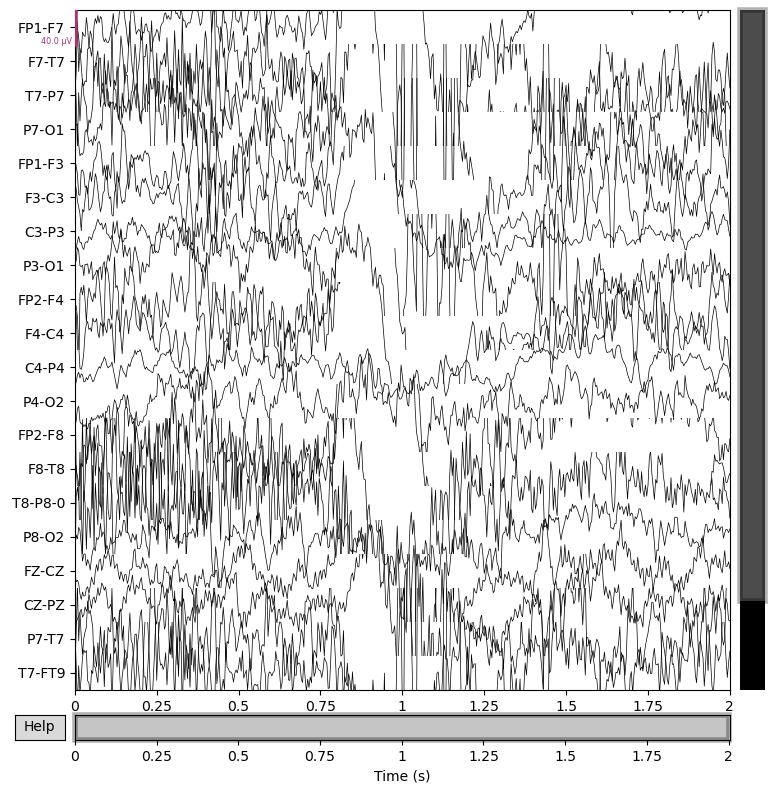

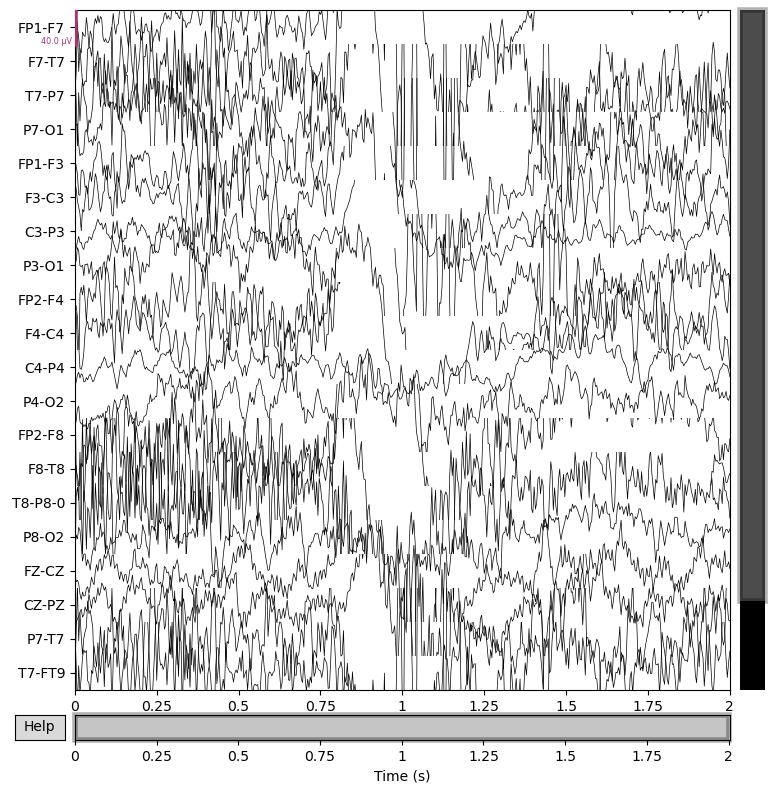

In [181]:
#Plotting seizure data
data1=data
data1= data1.crop(4900,4902)
data1.plot()

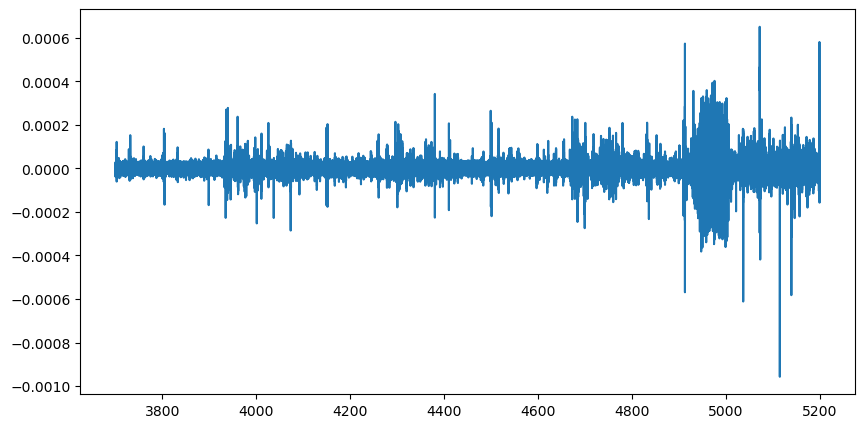

In [206]:
#Plotting ictal period
start=3700
end= start+1500
data=pd.DataFrame(raw_data)
data= data.iloc[6,256*start:256*end]
data=data.reset_index(drop=True)
fig,ax= plt.subplots(figsize=(10, 5))
x= np.arange(start,end,1/256)
ax.plot(x,data)
plt.show()

In [ ]:
PastData=pd.DataFrame(raw_data)
PastData= PastData.iloc[1,256*(start-1):256*start]
PastData=PastData.reset_index(drop=True)

In [ ]:
# Energy feature creation
data=pd.DataFrame(raw_data)
energy= pd.DataFrame()   

In [3]:
fc= np.linspace(0.5,25,3)

# Training Data

In [8]:
def SzData(SzStart,SzEnd):
    root= tk.Tk()
    file = askopenfilename()
    root.destroy()

    data = mne.io.read_raw_edf(file, preload=False)
    raw_data = data.get_data()
    data=pd.DataFrame(raw_data)
    # Seizure Normal Period
    Start= 0
    count=10
    End= Start+count
    Data=pd.DataFrame()
    SzDuration= range(SzStart, SzEnd+1, 1)
    
    for i in range(int(data.shape[1]/256)):
        td=pd.DataFrame()
        for ch in range(data.shape[0]):
            energy= [] 
            normData= data.iloc[ch,256*Start:256*End]
            EpochData= data.iloc[ch,256*i:256*(i+1)]

            MeanNormalData= np.mean(normData)
            MeanData= np.mean(EpochData)
            MeanDiff= MeanData/MeanNormalData

            MedianNormalData= np.median(normData)
            MedianData= np.median(EpochData)
            MedianDiff= MedianData/MedianNormalData

            StdNormalData= np.std(normData)
            StdData= np.std(EpochData)
            StdDiff= StdData/StdNormalData

            MaxNormalData= np.amax(normData)
            MaxData= np.amax(EpochData)
            MaxDiff= MaxData/MaxNormalData
            
            for k in range(0,2):
                a = firwin(1001,[fc[k], fc[k+1]], window = 'nuttall',pass_zero = False,nyq = 256) #Used FIR Filter
                y_filter = lfilter(a,1,EpochData)
                e = sum(np.absolute(y_filter)**2)
                energy.append(e)
            
            d= {"MeanCh"+str(ch+1):[MeanData], "MeanDiff"+str(ch+1):[MeanDiff], 
                "MedianCh"+str(ch+1):[MedianData], "MedianDiff"+str(ch+1):[MedianDiff], 
                "StdCh"+str(ch+1):[StdData], "StdDiff"+str(ch+1):[StdDiff], 
                "MaxCh"+str(ch+1):[MaxData], "MaxDiff"+str(ch+1):[MaxDiff], 
               "Energy1"+str(ch+1):[energy[0]], "Energy2"+str(ch+1):[energy[1]] }
            d=pd.DataFrame(d)
            td= pd.concat([td,d], axis=1, join= 'outer')
        Data= Data.append(td)
        #print(Data)
    ind= pd.Index(range(int(data.shape[1]/256))) 
    Data.insert(0, 'ID', ind+1)
    Data.insert(Data.shape[1],'Out',np.nan)
    for i in ind:
        if i+1 in SzDuration:
            label= 1
        else:
            label= 0
        Data['Out'].iloc[i]=label
    Data.set_index('ID')
    return Data

In [352]:
FData= pd.DataFrame()

In [354]:
#Creating test data
h=SzData(2382,2447)
FData= pd.concat([FData,h], axis=0, join= 'outer')

In [355]:
FData.to_excel('TestSeizureData3.xlsx', index= False)

In [319]:
#Checking how many seizure data are presents
import tkinter as tk
from tkinter.filedialog import askopenfilename
root= tk.Tk()
filename = askopenfilename()
root.destroy()
#Data= pd.read_excel(filename, usecols= 'A:AJ', index_col= 0 )
Data= pd.read_excel(filename, index_col= 0 )
print(Data.shape)
print(Data['Out'].sum(axis=0))

(23925, 231)
449


In [320]:
X = pd.DataFrame(Data.iloc[:, :-1])
y = pd.DataFrame(Data.iloc[:,-1])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, index=Data.index, columns=Data.iloc[:, :-1].columns)

# Classifier

In [323]:
def GetFeature(clf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rfe= RFECV(estimator= clf, min_features_to_select= 16, cv=3)
    #pipeline = Pipeline(steps=[('s',rfe),('m',clf)])
    #cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
    #n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1, error_score='raise')
    rfe.fit(X_train,y_train)
    print('The optimal number of features is {}'.format(rfe.n_features_))
    features = [f for f,s in zip(X_train.columns, rfe.support_) if s]
    print('The selected features are:')
    print ('{}'.format(features))
    RFX_train= pd.DataFrame(rfe.transform(X_train), columns= features)
    RFX_test= pd.DataFrame(rfe.transform(X_test))
    return RFX_train,RFX_test,y_train,y_test,features

In [324]:
X_train, X_test,y_train,y_test, features= GetFeature(clf=XGBClassifier())
params = {
        'min_child_weight': [3, 5, 8],
        'gamma': [0.8, 1, 1.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,7]
        }

model = XGBClassifier()

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

#Finding best hyperparameters
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=1, random_state=1001 )
random_search.fit(X_train,y_train)

grid_search = GridSearchCV(model, param_grid=params, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=1 )
grid_search.fit(X_train,y_train)

print('************Random Search***************')
print('---CV Result---')
print('Mean test scores', random_search.cv_results_['mean_test_score'])
print('Standard Standard deviation', random_search.cv_results_['std_test_score'])
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score for %d-fold search:' % (folds))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
print('********************************************************************************************')

print('************Grid Search***************')
print('---CV Result---')
print('Mean test scores', grid_search.cv_results_['mean_test_score'])
print('Standard deviation', grid_search.cv_results_['std_test_score'])
print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best score: ')
print(grid_search.best_score_)
print('\n Best hyperparameters:')
print(grid_search.best_params_)
print(features)

The optimal number of features is 77
The selected features are:
['MeanCh1', 'MeanDiff1', 'MedianCh1', 'MedianDiff1', 'StdCh1', 'StdDiff1', 'MaxCh1', 'MaxDiff1', 'Energy11', 'MeanDiff2', 'StdCh2', 'StdDiff2', 'MaxCh2', 'StdDiff3', 'Energy23', 'StdCh4', 'StdDiff4', 'MaxCh4', 'MaxDiff5', 'Energy25', 'MedianDiff6', 'StdDiff6', 'StdCh7', 'MeanCh8', 'StdCh8', 'Energy28', 'MeanCh9', 'StdCh9', 'StdDiff9', 'MaxDiff9', 'MedianCh10', 'MedianDiff10', 'StdCh10', 'StdDiff10', 'MaxDiff10', 'Energy110', 'StdCh11', 'StdDiff11', 'MaxCh11', 'MaxDiff11', 'StdCh12', 'StdDiff12', 'MaxCh12', 'Energy112', 'StdCh13', 'MaxCh13', 'StdCh14', 'StdDiff14', 'MaxCh14', 'Energy114', 'Energy214', 'StdCh15', 'MaxCh15', 'Energy215', 'MeanCh16', 'StdDiff16', 'MaxDiff16', 'Energy216', 'MedianDiff17', 'MaxCh17', 'MeanDiff18', 'StdCh18', 'MaxDiff18', 'MaxCh19', 'MaxDiff19', 'StdCh20', 'Energy220', 'MeanDiff21', 'MedianCh21', 'StdCh21', 'StdDiff21', 'MaxCh21', 'Energy121', 'Energy221', 'MedianCh22', 'StdDiff22', 'Energy222']


In [325]:
if grid_search.best_score_ >  random_search.best_score_:
    clf= grid_search.best_estimator_
else: 
    clf= random_search.best_estimator_

# Test Data

In [368]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
root= tk.Tk()
filename = askopenfilename()
root.destroy()
#Data= pd.read_excel(filename, usecols= 'A:AJ', index_col= 0 )
TestData= pd.read_excel(filename, index_col= 0 )
print(TestData.shape)
print(TestData['Out'].sum(axis=0))

(501, 231)
66


In [369]:
X_test2 = pd.DataFrame(TestData.iloc[:, :-1])
y_test2 = pd.DataFrame(TestData.iloc[:,-1])
scaler = MinMaxScaler()
X_test2 = scaler.fit_transform(X_test2)
X_test2 = pd.DataFrame(X_test2, index=TestData.index, columns=TestData.iloc[:, :-1].columns)

# RUSBoost

In [ ]:
model= AdaBoostClassifier(n_estimators=100, random_state=42)
clf = RUSBoostClassifier(estimator= model, random_state=42)
clf.fit(X_res, y_res)
prediction = clf.predict(X_test.values)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction))

In [ ]:
matrix_model = metrics.confusion_matrix(y_test,prediction)
confusion_metrics(matrix_model,'Model')
draw_confusion_matrix(matrix_model)

# SMOTE

In [364]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
sm = SMOTE(random_state=42)
X_train, X_test, y_train, y_test,f = GetFeature(clf=XGBClassifier())
X_res, y_res = sm.fit_resample(X_train, y_train)

Smodel = XGBClassifier()
#model= clf
Smodel.fit(X_res,y_res)

The optimal number of features is 20
The selected features are:
['StdCh1', 'MaxCh1', 'MaxDiff1', 'StdCh2', 'MaxCh2', 'StdCh4', 'MaxCh4', 'StdCh8', 'StdCh10', 'StdDiff11', 'StdCh14', 'StdDiff14', 'MaxCh14', 'StdCh15', 'MaxCh15', 'MaxCh16', 'StdCh21', 'MaxCh21', 'MaxDiff21', 'Energy221']


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [375]:
X_test2= X_test2[f]
prediction = Smodel.predict(X_test2.values)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test2, prediction))
matrix_model = metrics.confusion_matrix(y_test2,prediction)
print(matrix_model)

ACCURACY OF THE MODEL:  0.9481037924151696
[[432   3]
 [ 23  43]]


In [396]:
prediction = Smodel.predict(X_test2.values)
prediction= pd.DataFrame({'Pred':prediction})
prediction= prediction.set_index(y_test2.index)
y_test2= y_test2.rename(columns={'Out': 'Org'})
result= y_test2.merge(prediction, on= 'ID', how= 'inner')
print(result.iloc[350:400])

      Org  Pred
ID             
2350    0     0
2351    0     0
2352    0     0
2353    0     0
2354    0     0
2355    0     0
2356    0     0
2357    0     0
2358    0     0
2359    0     0
2360    0     0
2361    0     0
2362    0     0
2363    0     0
2364    0     0
2365    0     0
2366    0     0
2367    0     0
2368    0     0
2369    0     0
2370    0     0
2371    0     0
2372    0     0
2373    0     0
2374    0     0
2375    0     0
2376    0     0
2377    0     0
2378    0     0
2379    0     0
2380    0     0
2381    0     0
2382    1     0
2383    1     0
2384    1     0
2385    1     0
2386    1     0
2387    1     0
2388    1     1
2389    1     0
2390    1     1
2391    1     0
2392    1     1
2393    1     0
2394    1     1
2395    1     1
2396    1     1
2397    1     1
2398    1     1
2399    1     0


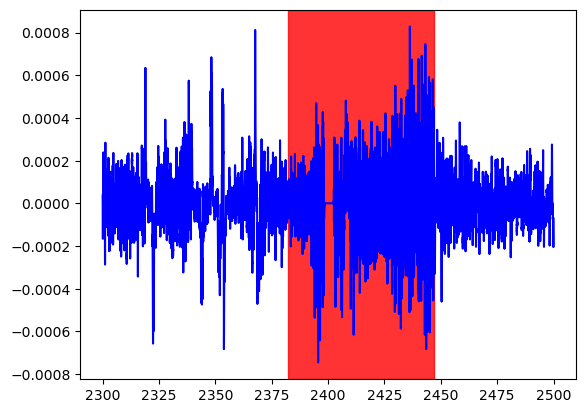

In [407]:
start=2300
end= start+200
data=pd.DataFrame(raw_data)
data= data.iloc[8,256*start:256*end]
data=data.reset_index(drop=True)

x= np.arange(start,end,1/256)

plt.plot(x, data, color='b', label='Normal') 
plt.axvspan(2382, xmax= end if end< 2447 else 2447, color='red', alpha=0.8)
plt.show()

In [333]:
if grid_search.best_score_ >  random_search.best_score_:
    model= grid_search.best_estimator_
else: 
    model= random_search.best_estimator_

X1_train= X_train.values  
# Fit on training data
model.fit(X1_train,y_train)
# Actual class predictions

prediction = model.predict(X_test)




# metrics are used to find accuracy or error

print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))


ACCURACY OF THE MODEL:  0.9942881025355252
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7055
           1       0.87      0.78      0.82       123

    accuracy                           0.99      7178
   macro avg       0.93      0.89      0.91      7178
weighted avg       0.99      0.99      0.99      7178

